In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns,set()

(<module 'seaborn' from '/Users/dr.k.rajaravichand/opt/anaconda3/lib/python3.8/site-packages/seaborn/__init__.py'>,
 set())

In [2]:
titanic_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 12)

In [5]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Checking various null entries in the dataset, with the help of heatmap

<AxesSubplot:>

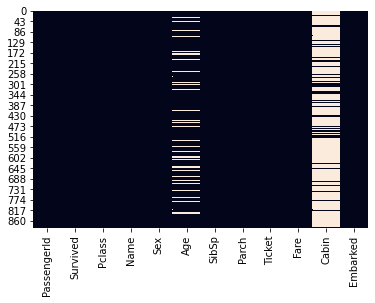

In [6]:
sns.heatmap(titanic_data.isnull(), cbar=False)

Age and cabin have null entries

Visualization of various relationships between variables

<AxesSubplot:xlabel='Survived', ylabel='count'>

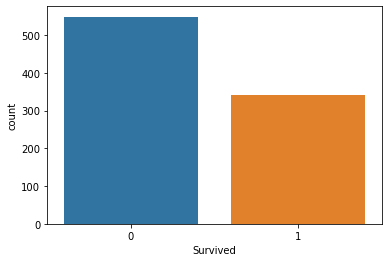

In [7]:
sns.countplot(x='Survived', data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

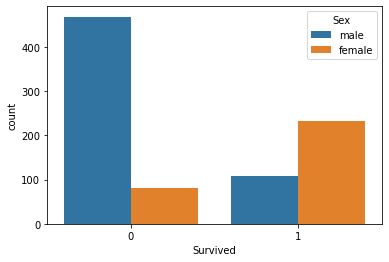

In [8]:
sns.countplot(x='Survived',hue='Sex', data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

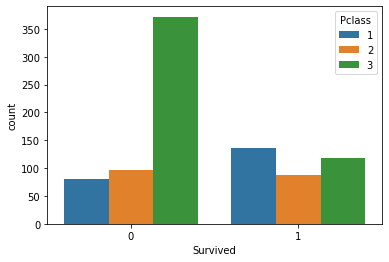

In [9]:
sns.countplot(x='Survived',hue='Pclass', data=titanic_data)

Replacing null values in Age column using function

In [10]:
def add_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return titanic_data[titanic_data['Pclass']==1]['Age'].mean()
        elif Pclass==2:
            return titanic_data[titanic_data['Pclass']==2]['Age'].mean()
        elif Pclass==3:
            return titanic_data[titanic_data['Pclass']==3]['Age'].mean()
    else:
        return Age
        

Applying the function:

In [11]:
titanic_data['Age']=titanic_data[['Age','Pclass']].apply(add_age,axis=1)

### Convert sex and embarked columns to numerical values

Ok, we are done with cleaning the data. We are going to convert some categorical data into numeric. For example, the sex column. We use the map function to assign numerical values for each category in Sex and Embarked columns.

In [12]:
titanic_data.Sex=titanic_data.Sex.map({'female':0, 'male':1})
titanic_data.Embarked=titanic_data.Embarked.map({'S':0, 'C':1, 'Q':2, 'nan':'NaN'})

Dropping Null Data

Dropping Column Cabin

In [13]:
titanic_data.drop('Cabin',axis=1,inplace=True)

Removing rows with null values

In [14]:
titanic_data.dropna(inplace=True)

In [15]:
titanic_data.drop(['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)

In [16]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


Split the data set into x and y data

In [17]:
x_data=titanic_data.drop('Survived',axis=1)
y_data=titanic_data['Survived']

Split the data set into training data and test data

70% of the data will be training data and %30 will be testing data.

In [18]:
from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)


# Create the model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression(max_iter=1000)

Train the model and create predictions

In [21]:
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

Let’s see how accurate is our model for predictions:

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       165
           1       0.77      0.71      0.73       102

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



In [24]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test_data, predictions))

Accuracy :  0.8052434456928839


Let’s see the confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_data, predictions)

array([[143,  22],
       [ 30,  72]])

In [26]:
cf_matrix=confusion_matrix(y_test_data, predictions)

<AxesSubplot:>

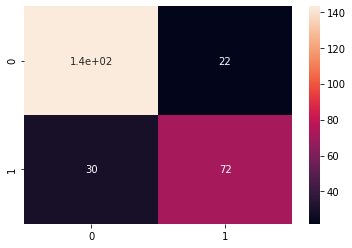

In [27]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)